# Lab 2: Text Classification

Note: For this lab exercise, it is recommended that you use [Google colab](https://colab.research.google.com/) to avoid issues concerning the deep learning module dependencies on your local system. If you have it available, we recommend that you change Runtime type to a GPU in Colab (you get a couple of free T4 GPU hours), otherwise CPU will work but will be slower for more demanding tasks.

For questions contact:

Martin Hansson, martin.hansson@dsv.su.se

### python中的pandas,numpy,series

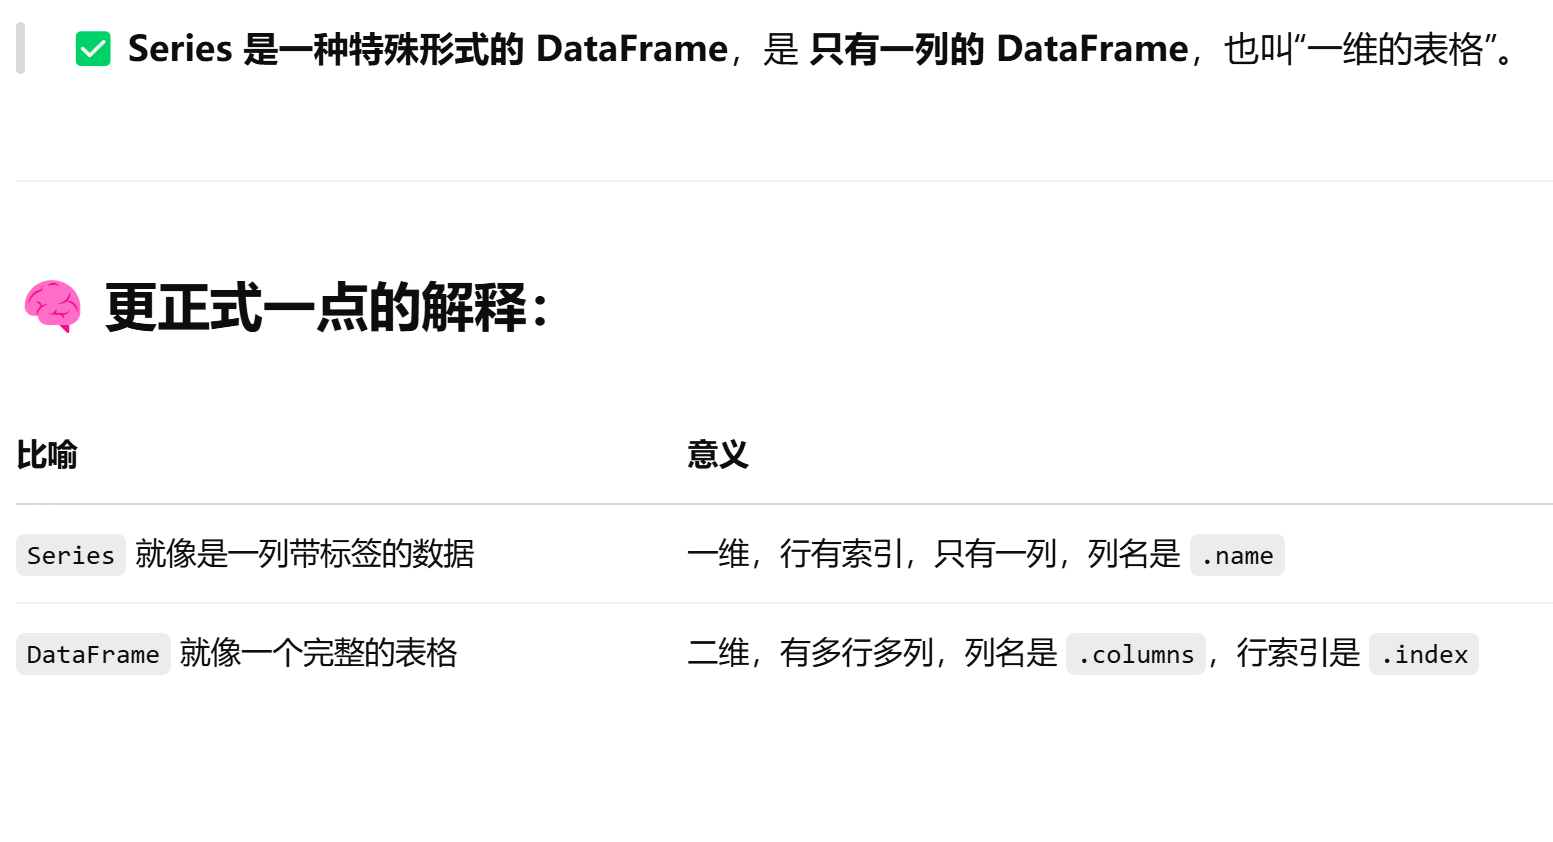
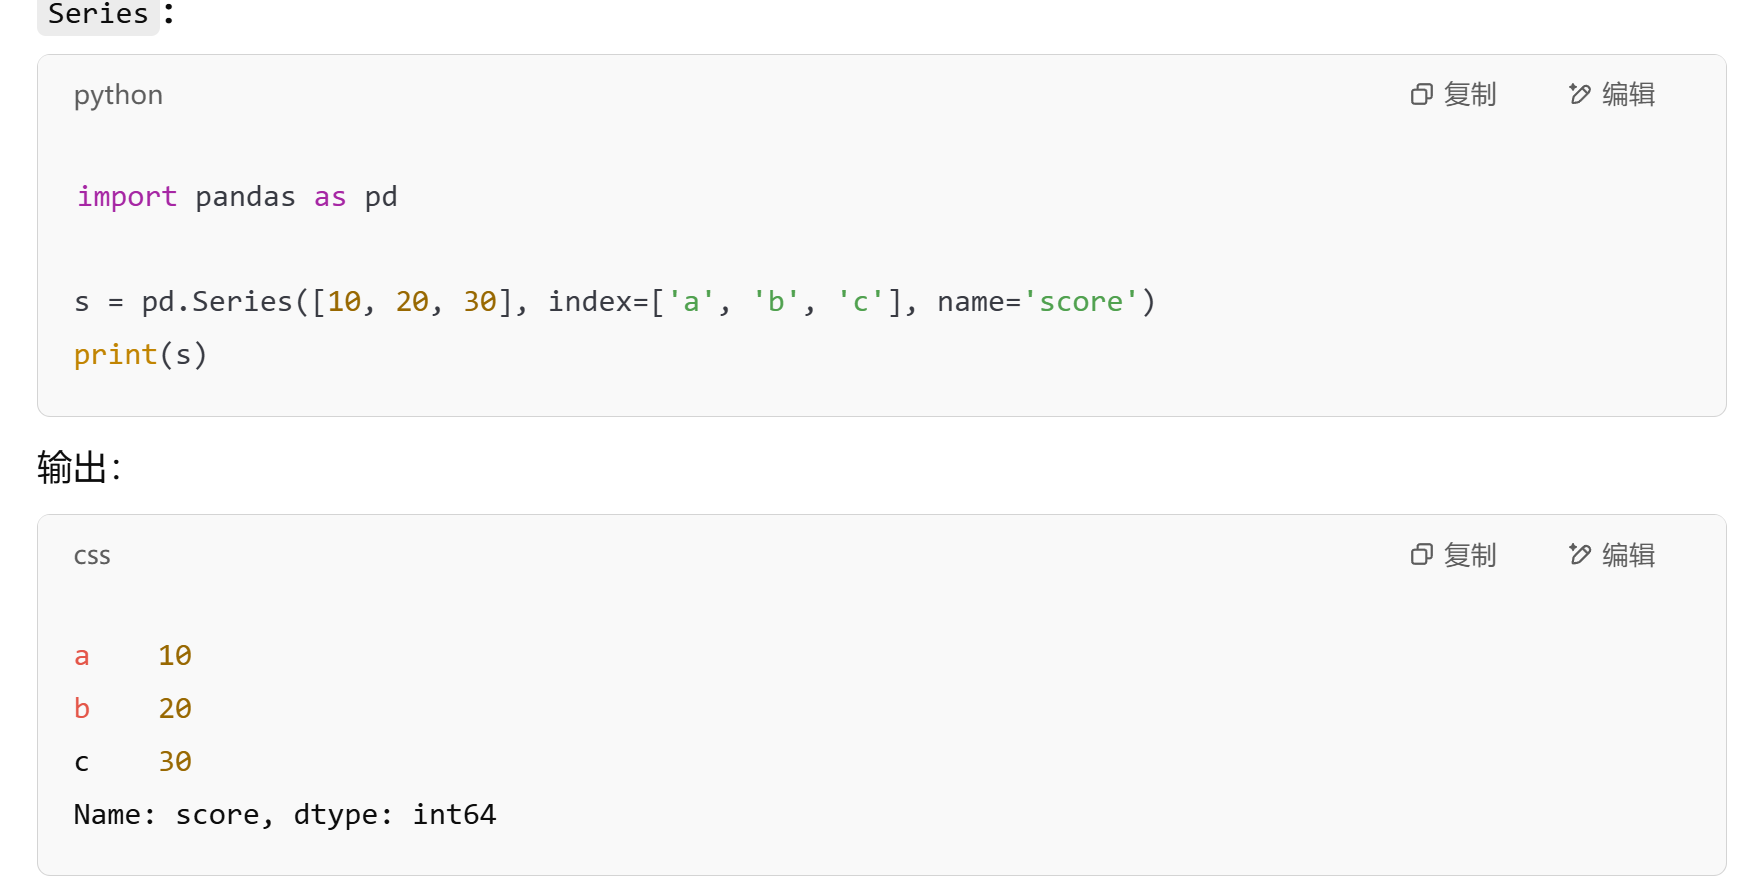
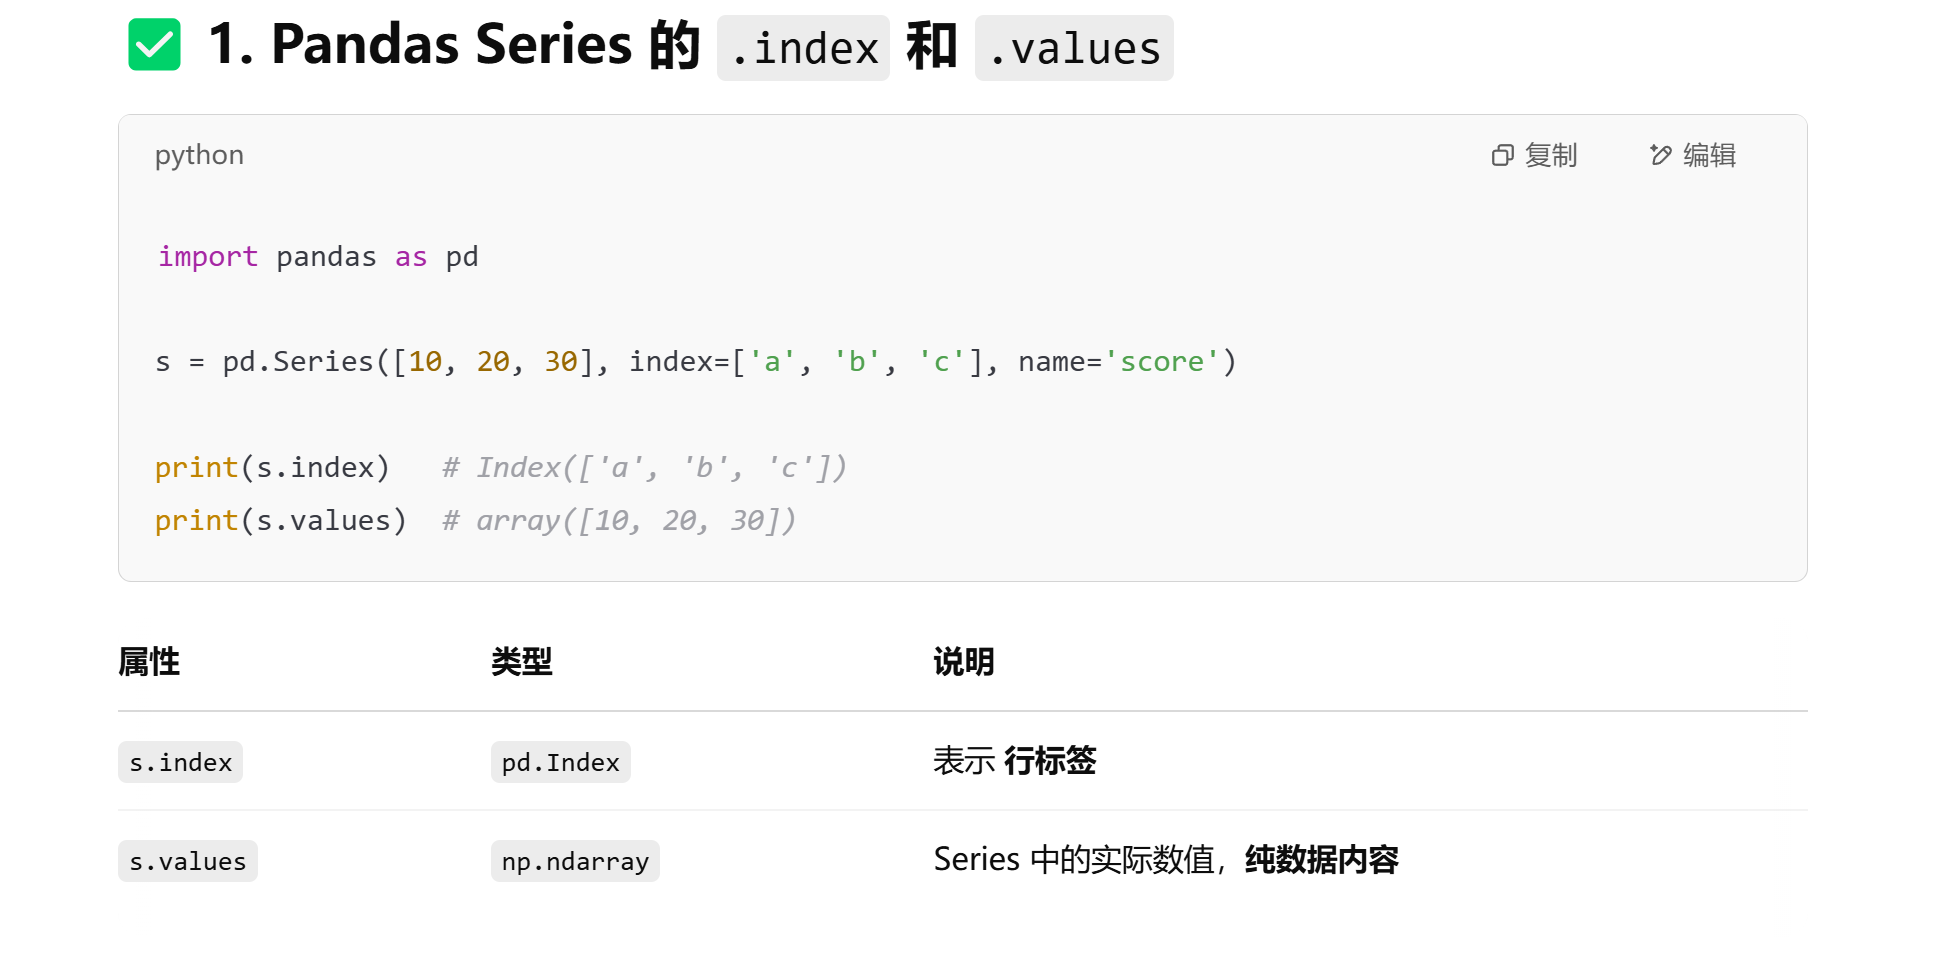
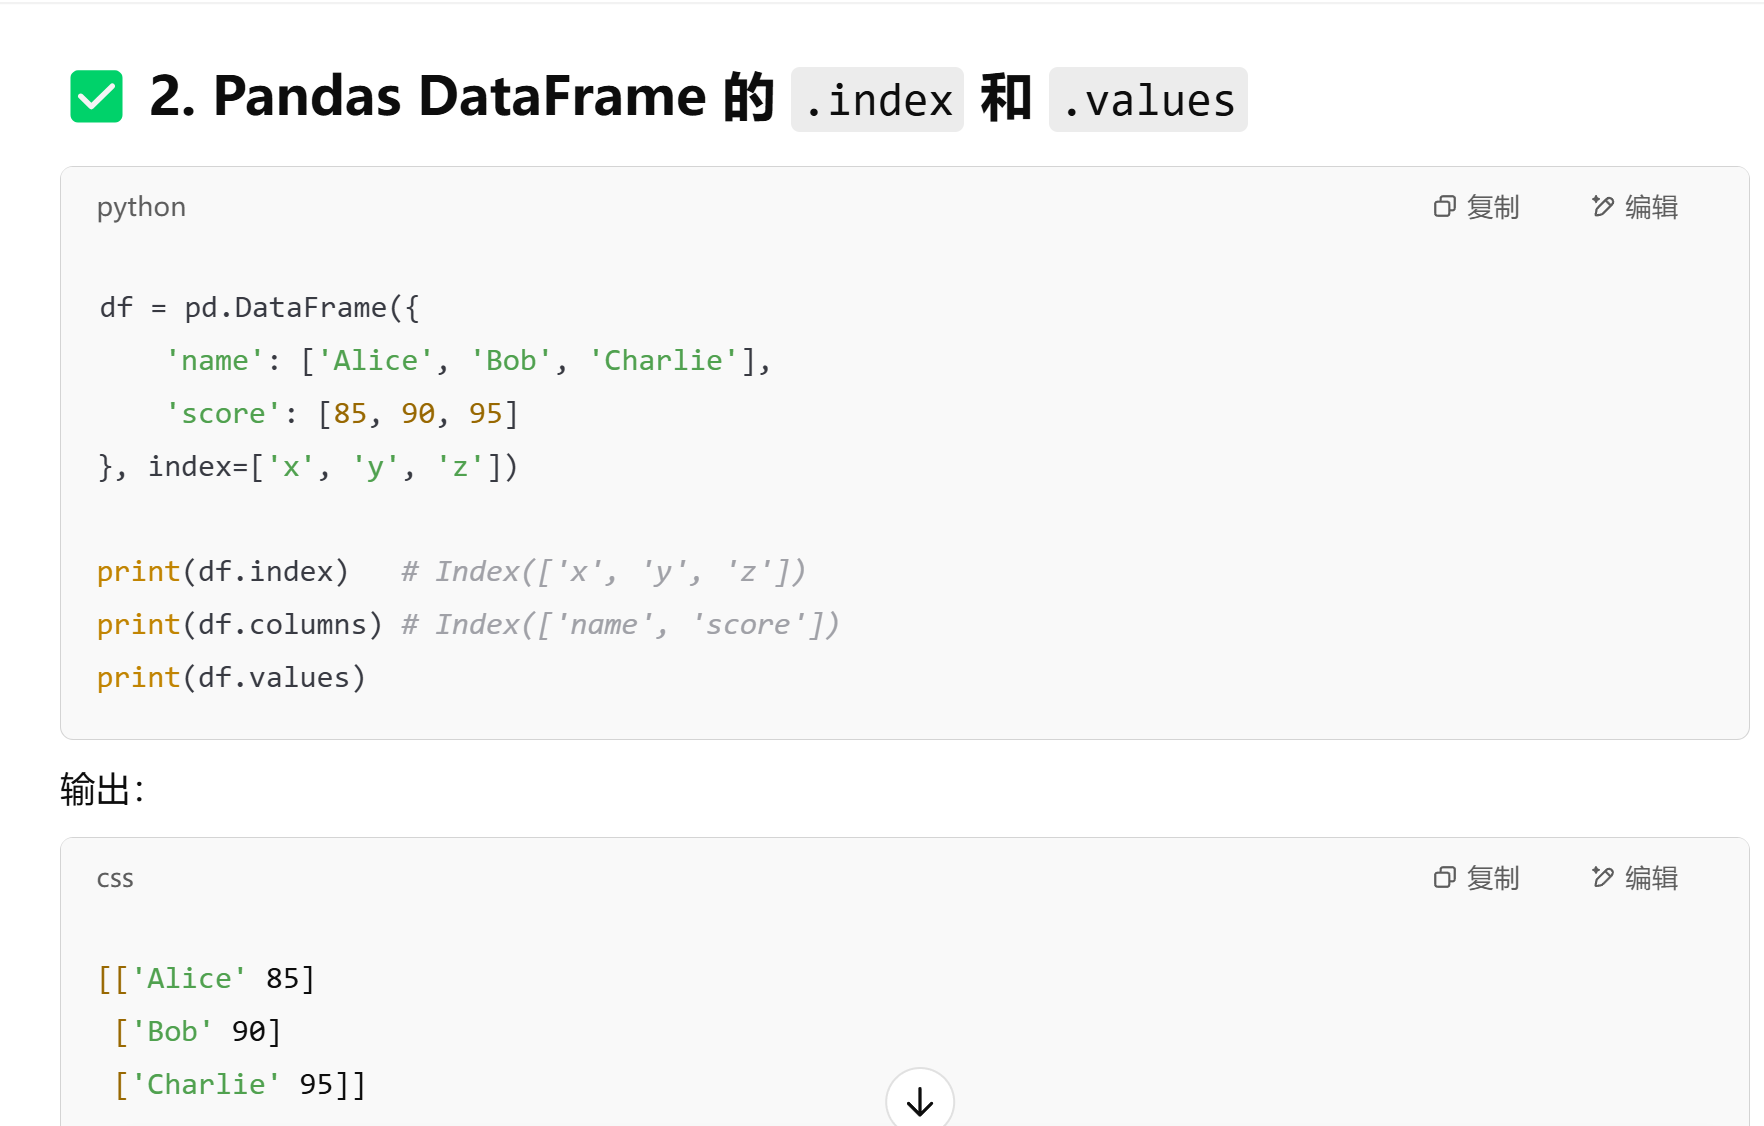
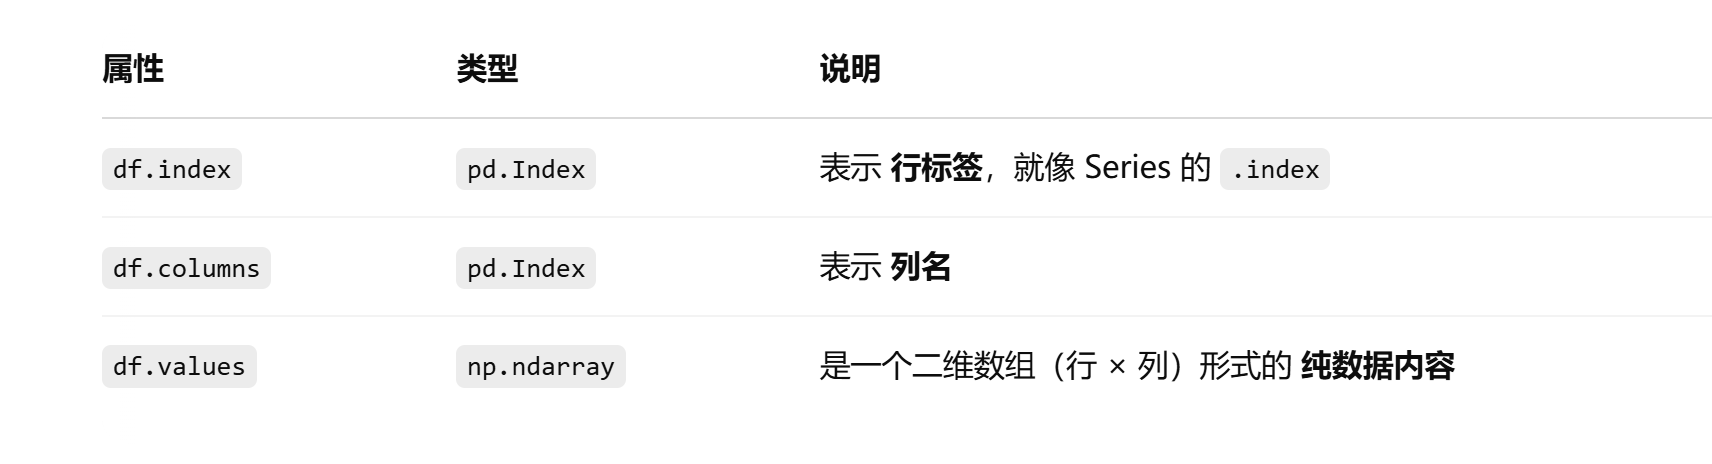
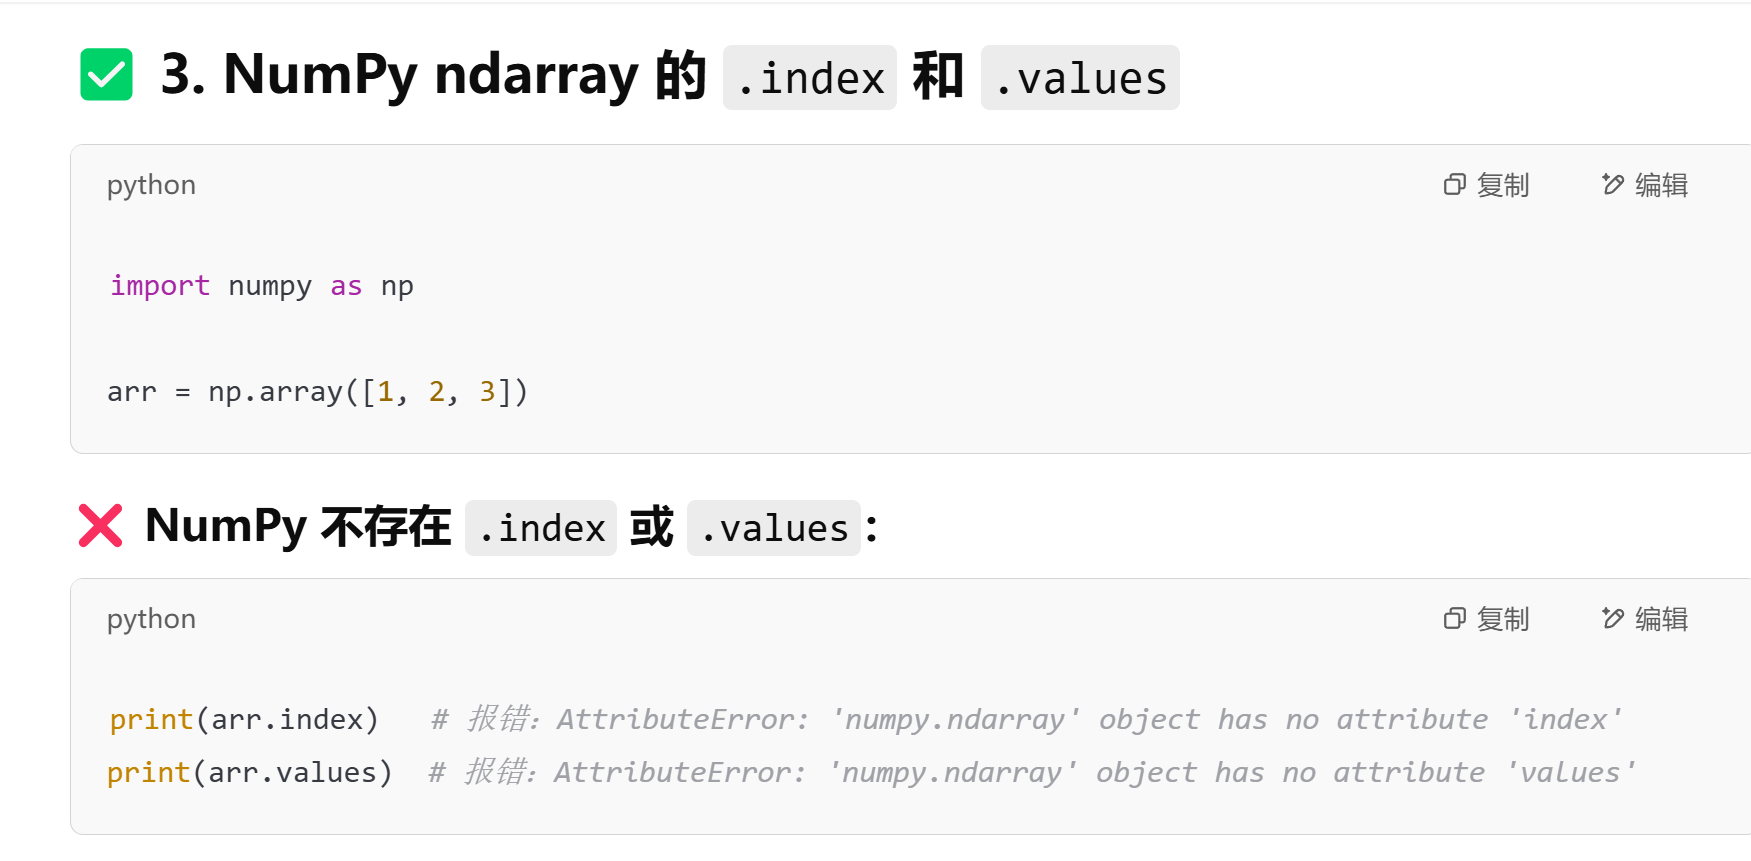
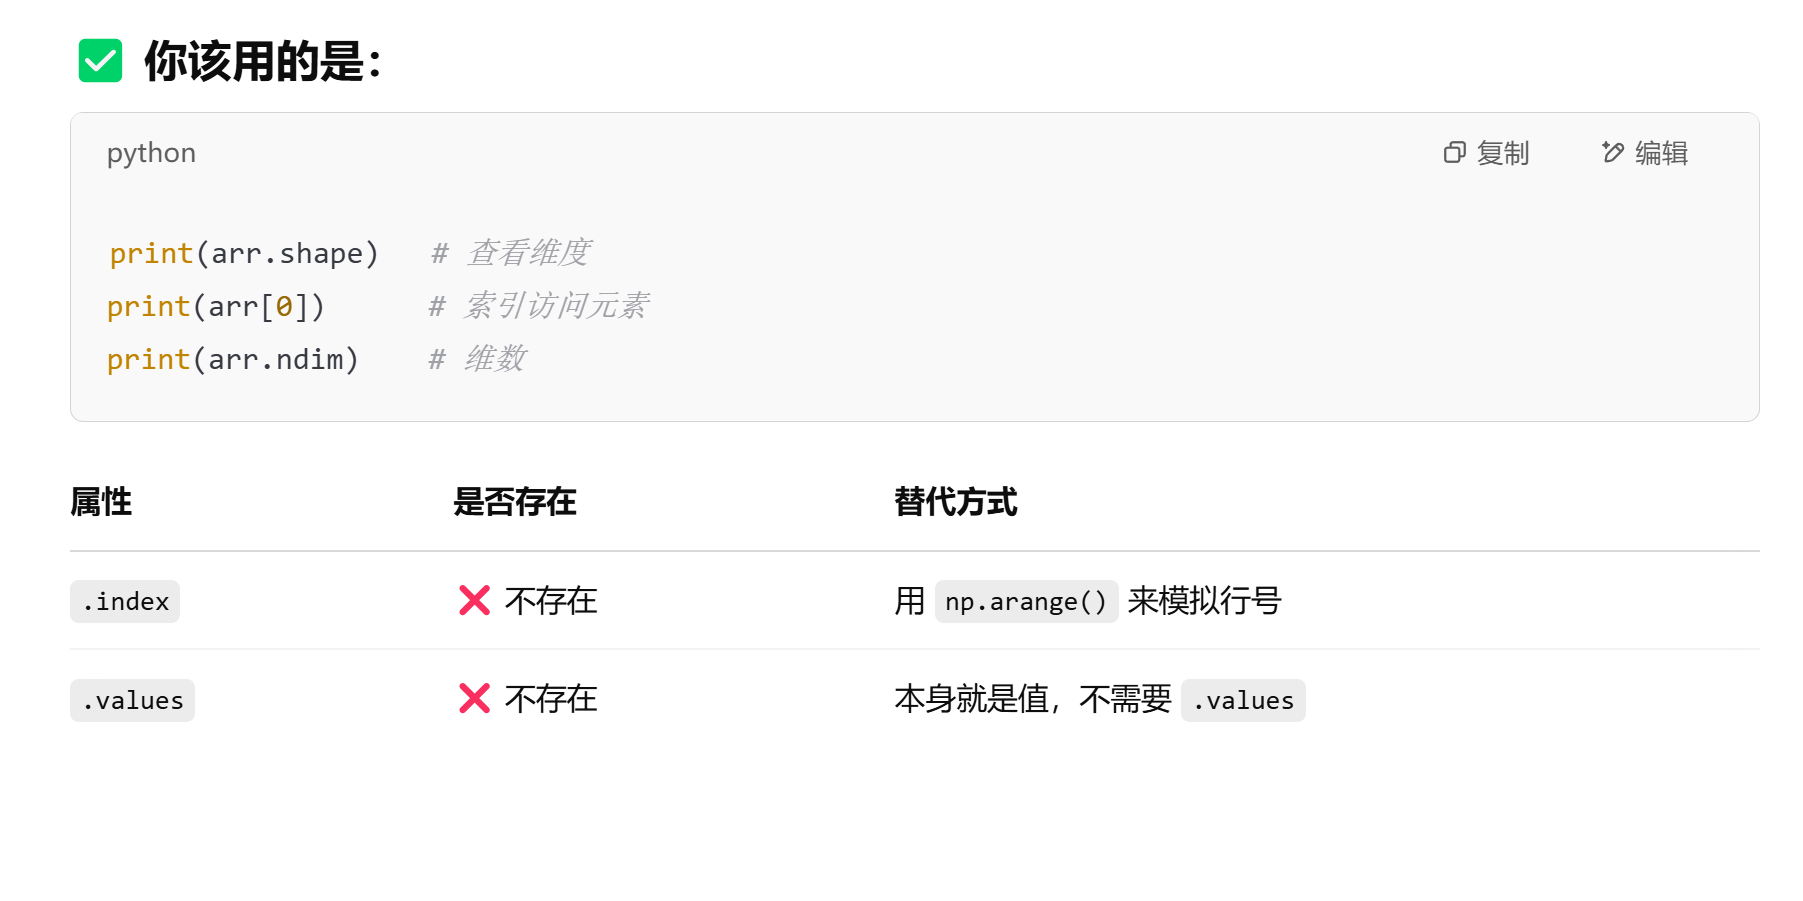

## 1. Introduction


In this lab exercise, we will perform classification of text into predefined classes using Machine Learning. In particular, we will be classifying the text from [BBC](http://mlg.ucd.ie/datasets/bbc.html) dataset consisting of 5 different classes.

In [ ]:
import pandas as pd
import numpy as np

## Suppress warnings

import warnings
warnings.filterwarnings("ignore")

## 2. Import Dataset

In [ ]:
# Note: The filepath has been specified considerning that the notebook is run using google colab.

!wget https://people.dsv.su.se/~maha6445/nlp/bbc_text.csv

In [ ]:
#delimiter是指用什么来对我们的数据进行分隔
bbc = pd.read_csv('data/bbc_text.csv', delimiter = ',')
bbc.head()

In [ ]:
## TODO: Randomly Select 100 examples from bbc dataframe, save to a new dataframe bbc_100
bbc_100 = bbc.sample(100, random_state= 42)
bbc_100.head()

In [ ]:
from sklearn.model_selection import KFold
## TODO: created 5-fold with KFold (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
#k-fold 一般返回的是整数索引
kf = KFold(n_splits=5 , shuffle=True, random_state=42)

## 3. Visualization

### Run the following code, if you have done the bbc samling and kf correctly, you will see the distribution of the Train/Test dataset in each fold.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i, (train_index, test_index) in enumerate(kf.split(bbc_100)):
    # Display train index distribution
    plt.scatter(train_index, [i] * len(train_index), alpha=0.6, label=f'Train Fold {i+1}' if i == 0 else "", color='blue')

    # Display test index distribution
    plt.scatter(test_index, [i] * len(test_index), alpha=0.6, label=f'Test Fold {i+1}' if i == 0 else "", color='orange')


plt.xlabel('Index')
plt.ylabel('Fold')
plt.title('Index Distribution Across K-Fold')
plt.yticks(np.arange(5), [f'Fold {i+1}' for i in range(5)])

# Adjust the legend
legend = plt.legend(frameon=True, loc='upper left', bbox_to_anchor=(1, 1))
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')
frame.set_alpha(1)  # Adjust transparency: 0 is transparent, 1 is opaque

plt.tight_layout()
plt.show()

### Question: What is the benefit of K-fold cross validation? Any disadvantages?

Your task here is to get an understanding of distribution of different classes in the data by visualization and compare them.

You are expected to generate two plots, one for each training and test dataset.

You can refer to the [Bar plots tutorial](https://pythonguides.com/matplotlib-plot-bar-chart/) to know more.

In [ ]:
import matplotlib.pyplot as plt


for i, (train_idx, test_idx) in enumerate(kf.split(bbc_100)):
    train_data = bbc_100.iloc[train_idx]
    test_data = bbc_100.iloc[test_idx]

    #注意，这里创建的这两个对象是dataframe里面的series
    #对于dataframe，有index（行标签）和values（列标签）
    #但是对于dataframe，行标签一般是行号，
    class_counts = train_data['category'].value_counts().sort_index()
    class_count_test = test_data['category'].value_counts().sort_index()
    
    plt.figure(figsize=(10,8))
    plt.bar(class_counts.index, class_counts.values, label= "train")
    plt.bar(class_count_test.index, class_count_test.values, label= "test")
    plt.legend()
    plt.title(f"fold {i+1} tarin and test")
# TODO: add the code below to plot the Distribution of classes in bbc_100 for each fold to separate staple diagrams for each fold.

## 4. Classification using Naive Bayes

For training and validation, we will use a [Multinomial Naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Here, you are expected to:

1. Vectorize the text from the training set.
2. Train the classifier
3. Evaluate the classifier using the test set.

Tip: You can use [sklearn's pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) functionality to perform steps 1 and 2.

Tip: You can use [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to print the results of evaluation.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#创建一个pipeline，我们转换为词频向量，然后使用朴素贝叶斯
text_clf = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("clf", MultinomialNB())
    ]
)

kf = KFold(n_splits=5, shuffle= True, random_state=42)
accurancy_scores = []
f1_scores = []

#下面和上面例子一样，得到我们的kfold得出的行索引后划分数据集训练模型
for i, (train_idx, test_indx) in enumerate(kf.split(bbc)):
    train_data = bbc.iloc[train_idx]
    test_data = bbc.iloc[test_idx]

    text_clf.fit(train_data["text"], train_data["category"])
    predictions = text_clf.predict(test_data["text"])

    acc = accuracy_score(test_data["category"], predictions)
    f1 = f1_score(test_data["category"], predictions, average="weighted")

    accurancy_scores.append(acc)
    f1_scores.append(f1)
    print(f"accuracy:{acc}, f1score:{f1}")
print(f"accuracy：{np.mean(accurancy_scores)}, f1score：{np.mean(f1_scores)}")

# TODO: Train and evaluate a Multinomial Naive Bayes classifier
# TODO: Add the code below to build a pipeline for the classifier.
# TODO: Evaluate your classifer on metrics of accuracy and f1_score(weighted).


## 5. Baseline Classifier

You can compare the performance of your Machine Learning model with a simple baseline classifier. One possibility could be to use a classifier that generates predictions by respecting the training set’s class distribution. You can consider using [Dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from scikit learn.



In [ ]:
from sklearn.dummy import DummyClassifier

# Evaluate the random baseline
baseline = DummyClassifier(strategy="stratified")

baseline_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', DummyClassifier(strategy="stratified", random_state=42))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = []
f1_scores = []

for i, (train_idx, test_idx) in enumerate(kf.split(bbc)):
    train_data = bbc.iloc[train_idx]
    test_data = bbc.iloc[test_idx]

    baseline_clf.fit(train_data["text"], train_data["category"])
    preds = baseline_clf.predict(test_data["text"])

    acc = accuracy_score(test_data["category"], preds)
    f1 = f1_score(test_data["category"], preds, average="weighted")

    acc_scores.append(acc)
    f1_scores.append(f1)

    print(f"Fold {i+1}: Accuracy = {acc:.4f}, F1 Score = {f1:.4f}")

print(f"\nAverage Accuracy: {np.mean(acc_scores):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
# TODO: Add the code below to train the baseline classifier and evaluate it.


### 为什么我们要使用这个叫做dummyclassifier的基础类

* 什么是baselineclassifier？

  是一个基础模型，我们这个模型不会学习任何特征，只会进行随意的猜测，如果我们训练的模型的表现还没这个好甚至和这个差不多，那代表我们的模型根本没有学习到任何东西


### Question: Is the result from the baseline classifier justified?

In [ ]:
# It is justified, it do not learning things, just use the percentage of data in our data, randomly predict the labels,
# this is the base performance of our model, if the trained model can`t has higher performance than it, it is not a good model

## 6. Grid Search

So far, you have trained the vectorizer and the classifer using their default parameters. However, in practical settings, one needs to optimize the parameters of the model to maximize the performance.

Here, you are asked to find the optimal parameters for the pipelines that you have created above using a 5 fold cross validation. The choice of hyperparameters for optimization are:

1. Bi-grams vs uni-grams vs tri-grams from [Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).
2. Additive smoothing  for the Multinomial naive bayes classifier $\alpha$ = {1, 0.1}
3. Tokenized vs non-tokenized text (For tokenization, you can use the function 'preprocess' that is given below as a parameter for the vectorizer.)


You can refer to the [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) documentation from the scikit-learn library. **Hint:** Make sure to use the `n_jobs` parameter of `GridSearchCV` to make the search faster.

Finally, print the parameters from the grid search that give the best performance.

### 我这里的sapcy是什么？这一步做了什么？

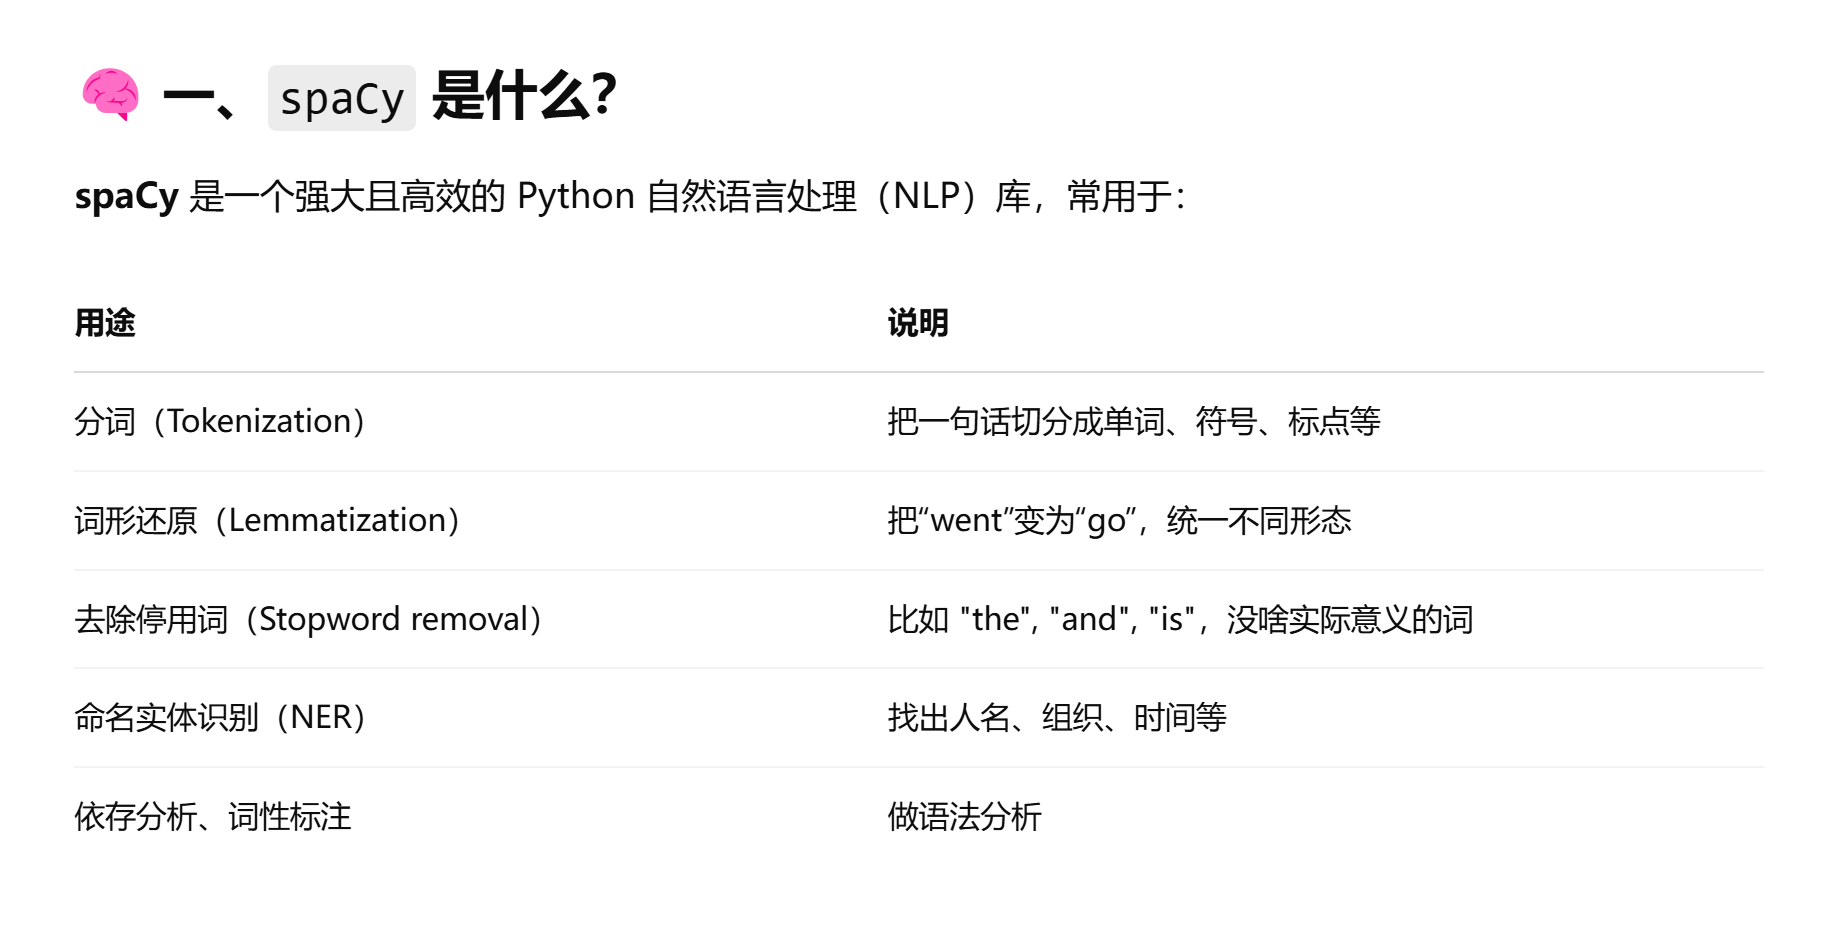

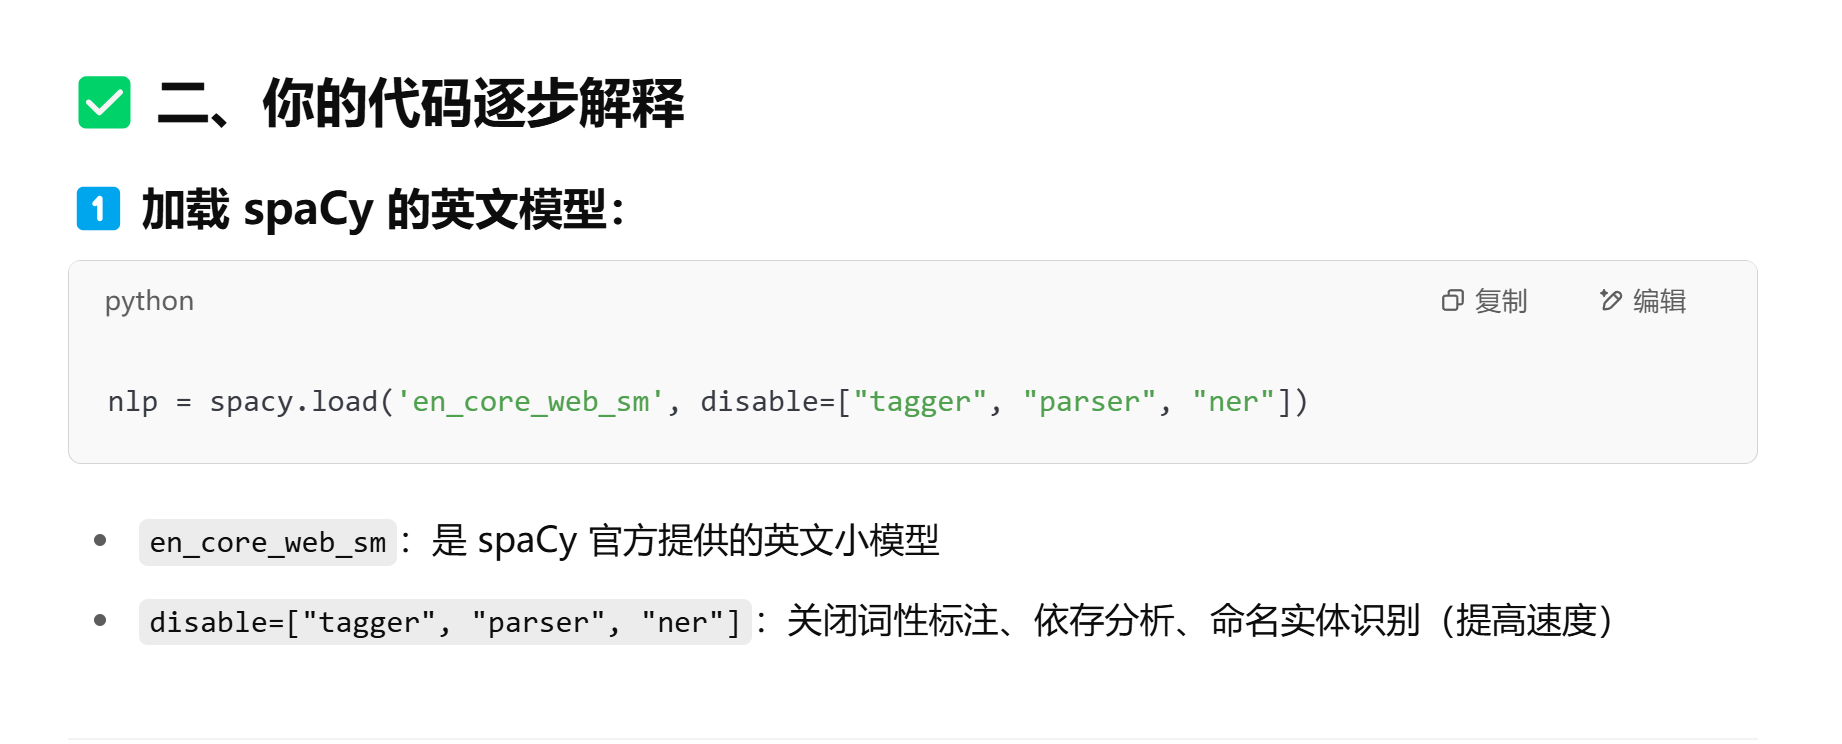

* 然后使用上面的spacy小模型，选择不是停用词并且词干是全字母的token，并且使用了lemma_进行了词形还原
* 得到了我们需要的清洗后的词根，方便输入我们的模型进行训练

In [ ]:
# Function preprocess can be used as a tokenizer.
import spacy
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner"])

def preprocess(text):
    doc = nlp(text)

    final_key=[]
    for token in doc:
        if token.is_stop==False and token.lemma_.isalpha():

            final_key.append(token.lemma_)

    return final_key

In [ ]:
from sklearn.model_selection import GridSearchCV

# TODO: Replace the ??? in the code and implement the grid search
# Note: Take a look at how you an specify the parameters for grid search from an example of n-grams. Similarly, you can specify the other remaining parameters.
# Note: this run would take 20 - 30 mins if you don't specify the n_jobs parameter
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

params = {'vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
          'vectorizer__tokenizer':[None, preprocess],
          'classifier__alpha':[1, 0.1]}

gridCV = GridSearchCV(pipe, param_grid= params, n_jobs= -1, cv= kf)
gridCV.fit(bbc['text'], bbc['category'])

In [ ]:
print(gridCV.best_params_)

### Use the best parameters to run the training(pipeline NB) again, see the difference!

In [ ]:
## TODO: Use the best parameters to run the training(pipleline NB) again.
pipeline_best = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 1), tokenizer=None)),
    ('clf', MultinomialNB(alpha=0.1))
])


for i, (train_idx, test_indx) in enumerate(kf.split(bbc)):
    train_data = bbc.iloc[train_idx]
    test_data = bbc.iloc[test_idx]

    pipeline_best.fit(train_data["text"], train_data["category"])
    predictions = pipeline_best.predict(test_data["text"])

    acc = accuracy_score(test_data["category"], predictions)
    f1 = f1_score(test_data["category"], predictions, average="weighted")

    accurancy_scores.append(acc)
    f1_scores.append(f1)
print(f"accuracy：{np.mean(accurancy_scores)}, f1score：{np.mean(f1_scores)}")

## 7. Fine-tuning using BERT

In this section, you will see how a pre-trained BERT model can be fine tuned for the task of text classification.

Run the following cells to fine-tune the model.

1. Comment on the results. Is there any improvement in performance when compared to MultinomialNB?

2. Try changing the number of epochs to 3 and then 5 to see if there is any improvement in the performance.

In [ ]:
#这里的百分号是jupyter中对pipinstall的封装，
#可以更好的同步，这里是在进行gradio的安装
#gradio是用来创建轻量级的web界面的
%pip install transformers torch gradio typing_extensions

In [ ]:
import pandas as pd
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

In [ ]:
# Initialize the BERT tokenizer
#下载分词器，小写版本
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
df = pd.read_csv('data/bbc_text.csv', delimiter = ',')

# Tokenize text
#把我们的所有的文本变成tokenid，bert可接受的输入
max_length = 512  # or another value suitable for your text
df['input_ids'] = df['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=max_length, truncation=True))

# Pad sequences
#bert要求输入相同长度的张量
#在这里给每一个元素加0到最长
max_len = max([len(sen) for sen in df['input_ids']])
df['input_ids'] = df['input_ids'].apply(lambda x: x + [0] * (max_len - len(x)))


# Convert labels to numbers
#返回不重复的标签的列表，然后使用enumerate获取每一个元素的
#索引和元素，其中的索引是我们准备给标签的数据
#然后使用label:index 这样来创建了一个map，
#列表的标签是类别名，值是index（输入我们的列表的y_pred）
label_map = {label: idx for idx, label in enumerate(df['category'].unique())}
#取类别列，使用map()修改为数字类型的类别，将其加入数据集
#名字为labels
df['labels'] = df['category'].map(label_map)

# Split data into train and test sets
#按照2，8分来划分我们的训练、验证集
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, dataframe):
        self.labels = dataframe['labels']
        self.text = dataframe['input_ids']

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels.iloc[idx]
        text = self.text.iloc[idx]
        return torch.tensor(text), torch.tensor(label)

# Create dataset
train_dataset = TextDataset(train_df)
test_dataset = TextDataset(test_df)

# Create dataloaders
batch_size = 8  # Adjust based on your GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW

# Load BERT model
#这里面的参数一个是指我们使用小写英文预训练模型
#第二个参数是指定我们的最后全连接层的输出数量
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_map))

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
epochs = 3  # or more based on your dataset size and model complexity
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        b_input_ids, b_labels = batch
        b_input_ids = b_input_ids.to(device)
        b_labels = b_labels.to(device)

        # Forward pass
        outputs = model(b_input_ids, labels=b_labels)

        # Backward pass and optimization
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f'Epoch {epoch} complete.')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Evaluation loop
model.eval()
predictions, true_labels = [], []
for batch in test_loader:
    b_input_ids, b_labels = batch
    b_input_ids = b_input_ids.to(device)
    b_labels = b_labels.to(device)

    with torch.no_grad():
        outputs = model(b_input_ids)

    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=1).tolist())
    true_labels.extend(b_labels.tolist())

accuracy = accuracy_score(true_labels, predictions)
score_f1 = f1_score(true_labels, predictions, average='weighted')

print(f'Test Accuracy: {accuracy}')
print(f" Score f1: {score_f1}")

### Question: How well did the BERT-based machine learning do with K-fold?

## 8. Let's created your first AI-based application Demo!

In [ ]:
import gradio as gr

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#这是我的预测函数，用户输入的内容会被传入这里面
def predict(text):
    # Preprocess the text
    #使用了bert的分词器将我们的输入转换为张量
    #return_tensors="pt"意思就是转化成张量
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = inputs.to(device)
    # Get predictions
    #关闭梯度计算加快运算结果
    with torch.no_grad():
        #运行我们训练好的分类模型，获取逻辑值
        #**是map输入，因为我们的inputs实际上是一个map
        #我们的输入实际上是一个张量map
        #这里面的logits是未经激活的预测值
        logits = model(**inputs).logits
    # Convert logits to probabilities
    #使用softmax激活我们的预测值并且去除多余维度
    #squeeze是指去除值为1的维度
    probabilities = torch.softmax(logits, dim=1).squeeze()
    # Map probabilities to label names (assuming label_map from earlier steps)
    #转换标签和概率，标签为原始标签，概率为float
    #zip()是把多个可迭代对象组合起来
    #成为一个新的可迭代对象的方法
    predictions = {label: prob.item() for label, prob in zip(label_map.keys(), probabilities)}

    return predictions

# Create Gradio interface
import gradio as gr

iface = gr.Interface(
    #提交数据时调用的函数
    fn=predict,
    #输入框，以及提示词
    inputs=gr.Textbox(lines=2, placeholder="Enter Text Here..."),
    #输出的值，使用label组件，显示最有可能的前三个
    #类型以及概率条
    outputs=gr.Label(num_top_classes=3)
)

#打开本地服务器并且部署
iface.launch()